# Using iterators in PythonLand

## Iterating over Iterables

In [1]:
# Create a list of strings: flash
flash = ['jay garrick', 'barry allen', 'wally west', 'bart allen']

# Print each list item in flash using a for loop
for person in flash:
    print(person)

# Create an iterator for flash: superhero
superhero = iter(flash)

# Print each item from the iterator
print(next(superhero))
print(next(superhero))
print(next(superhero))
print(next(superhero))

jay garrick
barry allen
wally west
bart allen
jay garrick
barry allen
wally west
bart allen


In [2]:
# Create an iterator for range(3): small_value
small_value = iter(range(3))

# Print the values in small_value
print(next(small_value))
print(next(small_value))
print(next(small_value))

# Loop over range(3) and print the values
for num in range(3):
    print(num)


# Create an iterator for range(10 ** 100): googol
googol = iter(range(10 ** 100))

# Print the first 5 values from googol
print(next(googol))
print(next(googol))
print(next(googol))
print(next(googol))
print(next(googol))

0
1
2
0
1
2
0
1
2
3
4


### Using Zip

In [3]:
# Create a list of strings: mutants
mutants = ['charles xavier', 'bobby drake', 'kurt wagner', 'max eisenhardt', 'kitty pryde']
aliases = ['prof x', 'iceman', 'nightcrawler', 'magneto', 'shadowcat']
powers  = ['telepathy', 'thermokinesis', 'teleportation', 'magnetokinesis', 'intangibility']

# Create a list of tuples: mutant_list
mutant_list = list(enumerate(mutants))

# Print the list of tuples
print(mutant_list)

# Change the start index
for index2, value2 in enumerate(mutants, start=1):
    print(index2, value2)

[(0, 'charles xavier'), (1, 'bobby drake'), (2, 'kurt wagner'), (3, 'max eisenhardt'), (4, 'kitty pryde')]
1 charles xavier
2 bobby drake
3 kurt wagner
4 max eisenhardt
5 kitty pryde


In [4]:
# Create a list of tuples: mutant_data
mutant_data = list(zip(mutants, aliases, powers))

# Print the list of tuples
print(mutant_data)

# Create a zip object using the three lists: mutant_zip
mutant_zip = zip(mutants, aliases, powers)

# Print the zip object
print(mutant_zip)

# Unpack the zip object and print the tuple values
for value1, value2, value3 in mutant_zip:
    print(value1, value2, value3)

[('charles xavier', 'prof x', 'telepathy'), ('bobby drake', 'iceman', 'thermokinesis'), ('kurt wagner', 'nightcrawler', 'teleportation'), ('max eisenhardt', 'magneto', 'magnetokinesis'), ('kitty pryde', 'shadowcat', 'intangibility')]
charles xavier prof x telepathy
bobby drake iceman thermokinesis
kurt wagner nightcrawler teleportation
max eisenhardt magneto magnetokinesis
kitty pryde shadowcat intangibility


In [5]:
# Create a zip object from mutants and powers: z1
z1 = zip(mutants, powers)

# Print the tuples in z1 by unpacking with *
print(*z1)

# Re-create a zip object from mutants and powers: z1
z1 = zip(mutants, powers)

# 'Unzip' the tuples in z1 by unpacking with * and zip(): result1, result2
result1, result2 = zip(*z1)

# Check if unpacked tuples are equivalent to original tuples
print(result1 == mutants)
print(result2 == powers)

('charles xavier', 'telepathy') ('bobby drake', 'thermokinesis') ('kurt wagner', 'teleportation') ('max eisenhardt', 'magnetokinesis') ('kitty pryde', 'intangibility')
False
False


## Using iterators to load large files into memory

In [10]:
import pandas as pd
# Define count_entries()
def count_entries(csv_file, c_size, colname):
    """Return a dictionary with counts of
    occurrences as value for each key."""
    
    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Iterate over the file chunk by chunk
    for chunk in pd.read_csv(csv_file, chunksize=c_size):

        # Iterate over the column in DataFrame
        for entry in chunk[colname]:
            if entry in counts_dict.keys():
                counts_dict[entry] += 1
            else:
                counts_dict[entry] = 1

    # Return counts_dict
    return counts_dict

In [12]:
# Call count_entries(): result_counts
result_counts = count_entries('../datasets/raw/tweets.csv',10,'lang')

# Print result_counts
print(result_counts)

{'en': 97, 'et': 1, 'und': 2}


# List Comprehensions and Generators

In [14]:
# Create a 5 x 5 matrix using a list of lists: matrix
matrix = [[col for col in range(5)] for row in range(5)]

# Print the matrix
for row in matrix:
    print(row)

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


In [15]:
# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

# Create list comprehension: new_fellowship
new_fellowship = [member for member in fellowship if len(member) >= 7]

# Print the new list
print(new_fellowship)

['samwise', 'aragorn', 'legolas', 'boromir']


In [16]:
# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

# Create list comprehension: new_fellowship
new_fellowship = [member if len(member) >= 7 else '' for member in fellowship]

# Print the new list
print(new_fellowship)

['', 'samwise', '', 'aragorn', 'legolas', 'boromir', '']


Dictionary Comprehensions

In [17]:
# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

# Create dict comprehension: new_fellowship
new_fellowship = {member: len(member) for member in fellowship}

# Print the new dictionary
print(new_fellowship)

{'frodo': 5, 'samwise': 7, 'merry': 5, 'aragorn': 7, 'legolas': 7, 'boromir': 7, 'gimli': 5}


## Generator expressions

In [20]:
# Create a list of strings
lannister = ['cersei', 'jaime', 'tywin', 'tyrion', 'joffrey']

# Define generator function get_lengths
def get_lengths(input_list):
    """Generator function that yields the
    length of the strings in input_list."""

    # Yield the length of a string
    for person in input_list:
        yield len(person)

# Print the values generated by get_lengths()
for value in get_lengths(lannister):
    print(value)

6
5
5
6
7


## List comprehensions for time-stamped data

In [23]:
import pandas as pd

df = pd.read_csv('../datasets/raw/tweets.csv')

# Extract the created_at column from df: tweet_time
tweet_time = df['created_at']

# Extract the clock time: tweet_clock_time
tweet_clock_time = [entry[11:19] for entry in tweet_time if entry[17:19] == '19']

# Print the extracted times
print(tweet_clock_time)

['23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19']


# Case Study -- World Bank

In [29]:
# two lists into dictionary by using zip
# Define lists2dict()
def lists2dict(list1, list2):
    """Return a dictionary where list1 provides
    the keys and list2 provides the values."""

    # Zip lists: zipped_lists
    zipped_lists = zip(list1, list2)

    # Create a dictionary: rs_dict
    rs_dict = dict(zipped_lists)

    # Return the dictionary
    return rs_dict

In [27]:
""" test data """
feature_names = ['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year', 'Value']
row_vals = ['Arab World', 'ARB', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'SP.ADO.TFRT', '1960', '133.56090740552298']

In [28]:
# Call lists2dict: rs_fxn
rs_fxn = lists2dict(feature_names, row_vals)

# Print rs_fxn
print(rs_fxn)

{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}


In [35]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Define plot_pop()
def plot_pop(filename, country_code):

    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    # Initialize empty DataFrame: data
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
        # Append DataFrame chunk to data: data
        data = pd.concat([data, df_pop_ceb])

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')

/var/folders/zd/ndrhnvl55pj0375gxt18wyzc0000gn/T/ipykernel_90101/776656577.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
/var/folders/zd/ndrhnvl55pj0375gxt18wyzc0000gn/T/ipykernel_90101/776656577.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
/var/folders/zd/ndrhnvl55pj0375gxt18wyzc0000gn/T/ipykernel_90101/776656577.p

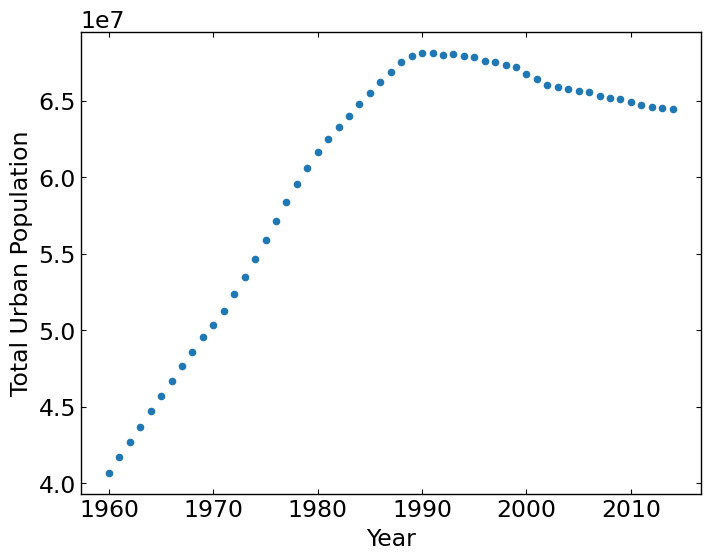

In [36]:
fname = '../datasets/raw/world_ind_pop_data.csv'

# Call plot_pop for country code 'CEB'
plot_pop(fname, 'CEB')

/var/folders/zd/ndrhnvl55pj0375gxt18wyzc0000gn/T/ipykernel_90101/776656577.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
/var/folders/zd/ndrhnvl55pj0375gxt18wyzc0000gn/T/ipykernel_90101/776656577.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
/var/folders/zd/ndrhnvl55pj0375gxt18wyzc0000gn/T/ipykernel_90101/776656577.p

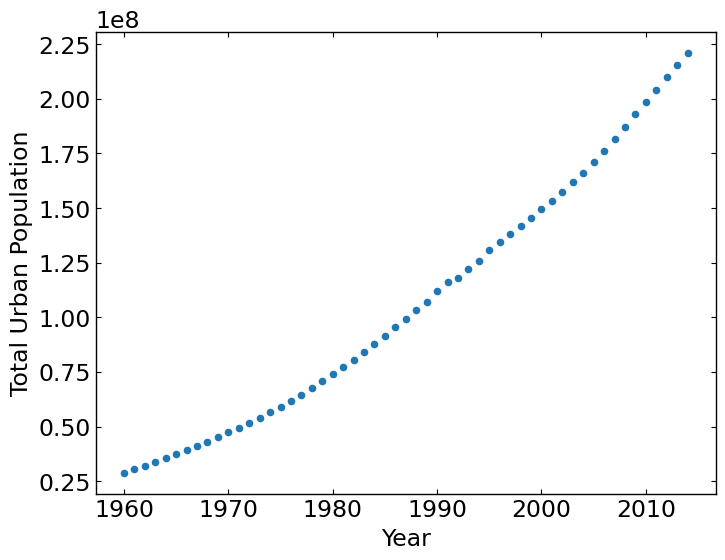

In [37]:
# Call plot_pop for country code 'CEB'
plot_pop(fname, 'ARB')